In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_transform as tft
import os
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Explore data</h2> 

In [2]:
# Import data
train_path = 'train_data.csv'
df =  pd.DataFrame.from_csv(train_path, index_col=5)
df.head(10)

/Users/evanderknaap/Documents/Projects/carpredictor/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


,Price,Year,Mileage,City,State,Make,Model
Vin,,,,,,,
2T1BA02E9VC173382,2165,1997,235712,Avon,IN,Toyota,Corolla4dr
1G6KY5297VU822873,2800,1997,161580,Boaz,AL,Cadillac,Seville4dr
4T1BF12B3VU179366,2495,1997,182835,Cary,NC,Toyota,Avalon4dr
3GKGK26J0VG520954,2600,1997,211940,Elko,NV,GMC,Suburban2500
2S3TD03V5V6404811,3800,1997,155783,Elko,NV,Suzuki,Sidekick4dr
WDBFA67FXVF151029,8691,1997,81000,Fife,WA,Mercedes-Benz,SL-ClassSL500
1FMDU32E6VUA04386,4491,1997,56853,Mesa,AZ,Ford,Explorer4dr
1FDEE14LXVHAU2407,3933,1997,158236,Mora,MN,Ford,Econoline
4TAWM72N7VZ224560,8995,1997,270806,Reno,NV,Toyota,Tacoma4WD


<h2>Explore the dataset using Seaborn plot</h2>

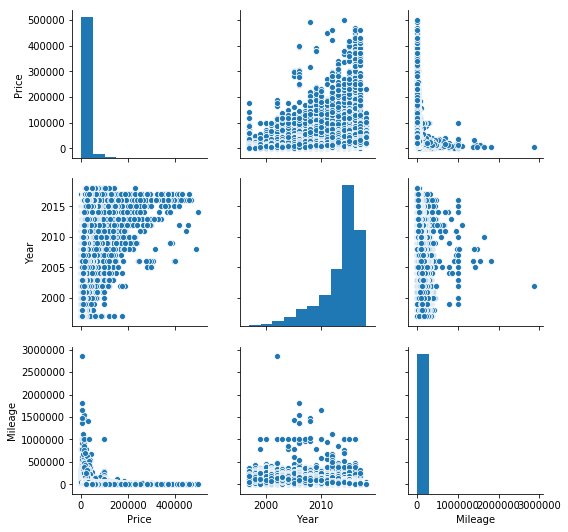

In [10]:
sns.pairplot(data=df)

By throwing all the cars on big pile, relations appear between the age of the car and the price. 
The age of the car, and the milage, does not appear to have a lot off additional information. There are more ars online of more recent build years. Distribution of milage and prices are unclear

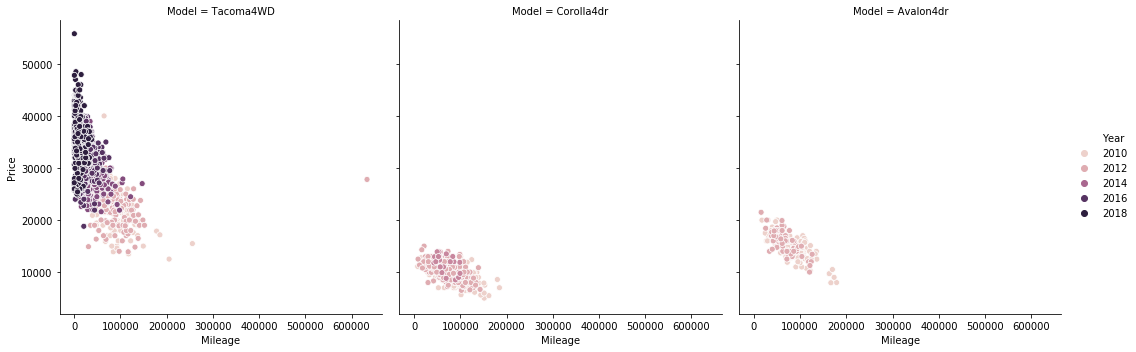

In [68]:
filt1 = df['Model']=='Corolla4dr'
filt2 = df['Model']=='Avalon4dr'
filt3 = df['Model']=='Tacoma4WD'
cols = ['Price','Mileage','Model','Year','State'] 
df_model = df[cols][filt1 | filt2 | filt3]
sns.relplot(x='Mileage',y='Price',hue='Year', col='Model', data=df_model[cols][df_model['Year']>2010])

If we filter on a specific model, there appears a linear relationship between the mileage of the car and the price. Since ther are over $2500$ types of cars, it might make sense to hash them, later on as features.  There appear to be two groupings of the 

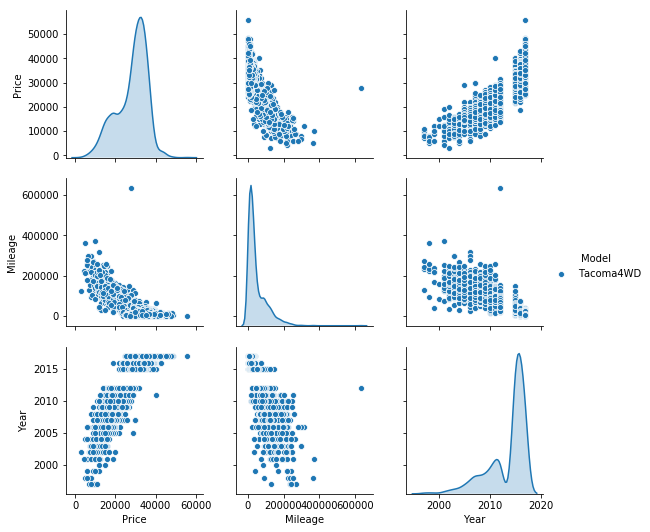

In [69]:
sns.pairplot(data=df_model[cols][df_model['Model']=='Tacoma4WD'], hue='Model')

The price, and mileage of the cars appear to have a normal distribution. There are models for sale in recent years, espcially after 2005. There is a correlation between mileage and price, though it does not seem to be highly linear. 
The year and price seems to have an interesting correlation, though

(array([1.62330e+04, 8.31850e+04, 1.59534e+05, 1.62195e+05, 1.01679e+05,
        7.94400e+04, 5.12340e+04, 3.21560e+04, 1.65550e+04, 1.22470e+04,
        6.90400e+03, 4.58200e+03, 1.94300e+03, 1.63300e+03, 8.46000e+02,
        7.05000e+02, 3.76000e+02, 3.63000e+02, 1.94000e+02, 4.09000e+02,
        1.04000e+02, 1.36000e+02, 8.90000e+01, 1.31000e+02, 6.60000e+01,
        1.09000e+02, 5.50000e+01, 8.70000e+01, 4.90000e+01, 7.20000e+01]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.,
        105000., 110000., 115000., 120000., 125000., 130000., 135000.,
        140000., 145000., 150000.]),
 <a list of 30 Patch objects>)

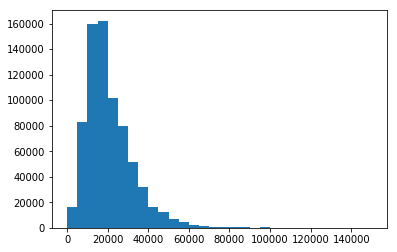

In [4]:
plt.hist(prices, bins=30, range=[0, 150000])

(array([46486., 63482., 83054., 92767., 91904., 68333., 42590., 35882.,
        32808., 29842., 26391., 24314., 18777., 15431., 13072., 10487.,
         8185.,  6674.,  5258.,  4203.,  3197.,  2586.,  1871.,  1481.,
         1071.,   835.,   652.,   512.,   414.,   282.]),
 array([     0.        ,   8333.33333333,  16666.66666667,  25000.        ,
         33333.33333333,  41666.66666667,  50000.        ,  58333.33333333,
         66666.66666667,  75000.        ,  83333.33333333,  91666.66666667,
        100000.        , 108333.33333333, 116666.66666667, 125000.        ,
        133333.33333333, 141666.66666667, 150000.        , 158333.33333333,
        166666.66666667, 175000.        , 183333.33333333, 191666.66666667,
        200000.        , 208333.33333333, 216666.66666667, 225000.        ,
        233333.33333333, 241666.66666667, 250000.        ]),
 <a list of 30 Patch objects>)

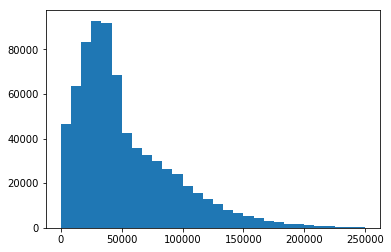

In [5]:
mileage = df.loc[:,'Mileage']
plt.hist(mileage, bins=30, range=[0, 250000])

(array([4.07000e+02, 3.91000e+02, 1.02000e+03, 3.83000e+02, 4.38000e+02,
        3.25000e+02, 3.07000e+02, 2.57000e+02, 2.26000e+02, 3.41000e+02,
        3.03000e+02, 4.30000e+02, 4.62000e+02, 5.41000e+02, 6.43000e+02,
        9.15000e+02, 1.22700e+03, 1.79500e+03, 3.16900e+03, 5.28800e+03,
        9.55500e+03, 1.20240e+04, 1.84800e+04, 3.00330e+04, 5.07080e+04,
        8.02860e+04, 1.24190e+05, 1.21781e+05, 8.98190e+04, 9.15570e+04,
        5.90690e+04, 2.29670e+04, 4.13800e+03, 3.63000e+02, 2.90000e+01,
        9.00000e+00, 2.50000e+01, 5.00000e+00, 3.00000e+00, 1.00000e+00]),
 array([ 1.60943791,  1.940827  ,  2.27221608,  2.60360516,  2.93499424,
         3.26638333,  3.59777241,  3.92916149,  4.26055058,  4.59193966,
         4.92332874,  5.25471782,  5.58610691,  5.91749599,  6.24888507,
         6.58027416,  6.91166324,  7.24305232,  7.5744414 ,  7.90583049,
         8.23721957,  8.56860865,  8.89999774,  9.23138682,  9.5627759 ,
         9.89416498, 10.22555407, 10.55694315, 10

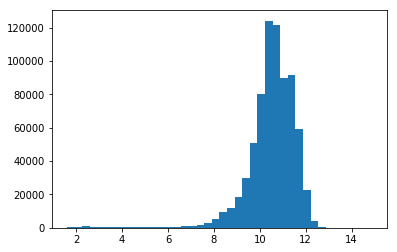

In [6]:
milage_log = np.log(mileage)
plt.hist(milage_log, bins=40)

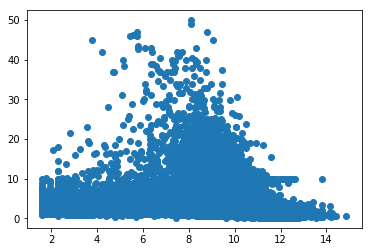

In [7]:
# Apply a log distribution to normal
miles = df.loc[:,'Mileage']
prices_norm = df.loc[:,'Price']/10000
mile_logs = miles.apply(np.log)
plt.scatter(mile_logs,prices_norm)
plt.show()

In [3]:
df.columns

Index([u'Price', u'Year', u'Mileage', u'City', u'State', u'Make', u'Model'], dtype='object')

<h2>Import Data</h2>
Create the input_fn that reads TFRecords from disk. The input_fn applies transformations on the features, using the tf_transform_columns. 

In [3]:
tf_transform_output = tft.TFTransformOutput('../output')
transformed_feature_spec = tf_transform_output.transformed_feature_spec()
transformed_train_examples = os.path.join('../output','train_data-00000-of-00001')
transformed_eval_examples = os.path.join('../output','test_data-00000-of-00001')

In [134]:
def input_fn():
    """ Returns a batch of transformed features & labels for training
    Args:
    Output:
        transformed_features:   shuffled batch of features
        transformed_labels:     shuffled batch of labels 
    """
    
    dataset = tf.data.experimental.make_batched_features_dataset(
        file_pattern=transformed_train_examples,
        batch_size=4,
        features=tf_transform_output.transformed_feature_spec(),
        reader=tf.data.TFRecordDataset,
        shuffle=True,
    )

    # Get a batch of transformed features, including labels
    transformed_features = dataset.make_one_shot_iterator().get_next()
    
    transformed_labels = transformed_features.pop('Price')

    return transformed_features, transformed_labels

In [35]:
# Type of data that is coming 
# Tensorflow estimator require tf feature columns, which can be one of two things; 
# Numeric columns or categorical. Conventiently, in the case our data, it specifies the dtype
INPUT_HEADERS = ["Price","Year","Mileage","City","State","Vin","Make","Model"]
NUMERIC_FEATURE_KEYS = ["Year","Mileage","Price"]
CATEGORICAL_FEATURE_KEYS = ["City","State","Vin","Make","Model"]

# We'll read in the raw data from csv file. We'll need to decode this raw data
# to schema containing Tensors. We construct the schema here, which we'll pass
# to the decoder. Note that we'll generare need a second schema, contains
# features we add after reading the data. E.g., cross features
RAW_DATA_FEATURE_SPEC = dict(  
        [(name, tf.FixedLenFeature([],tf.float32)) for name in NUMERIC_FEATURE_KEYS] +
        [(name, tf.FixedLenFeature([],tf.string)) for name in CATEGORICAL_FEATURE_KEYS] 
    )

feature_placeholders = dict(
    [(key, tf.placeholder(tf.string, None)) for key in ["Make"]] +
    [(key, tf.placeholder(tf.float32, None)) for key in ["Mileage"]] 
    )

#feature_placeholders.pop("Price")

# Transform the featurs using our Tf Transform operations
features = tf_transform_output.transform_raw_features(feature_placeholders)

print tf.estimator.export.ServingInputReceiver(features, feature_placeholders)

value: "\n\013\n\tConst_5:0\022\005State"

value: "\n\013\n\tConst_6:0\022\004City"

value: "\n\013\n\tConst_8:0\022\005Model"

value: "\n\013\n\tConst_9:0\022\004Make"

value: "\n\014\n\nConst_10:0\022\003Vin"

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
ServingInputReceiver(features={u'City': <tf.Tensor 'transform_12/transform/inputs/City_copy:0' shape=(?,) dtype=string>, u'Mileage': <tf.Tensor 'transform_12/transform/scale_to_z_score_1/Select:0' shape=(?,) dtype=float32>, u'Price': <tf.Tensor 'transform_12/transform/scale_to_z_score/Select:0' shape=(?,) dtype=float32>, u'Vin': <tf.Tensor 'transform_12/transform/inputs/Vin_copy:0' shape=(?,) dtype=string>, u'State': <tf.Tensor 'transform_12/transform/inputs/State_copy:0' shape=(?,) dtype=string>, u'Year': <tf.Tensor 'transform_12/transform/scale_to_z_score_2/Select:0' shape=(?,) dtype=float32>, u'Model': <tf.Tensor 'transform_12/transform/inputs/Model_copy:0' shape=(?,) dtype=string>, u'Ma

In [135]:
def eval_input_fn():
    """ Returns a batch of transformed features & labels for training
    Args:
    Output:
        transformed_features:   shuffled batch of features
        transformed_labels:     shuffled batch of labels 
    """
    
    dataset = tf.data.experimental.make_batched_features_dataset(
        file_pattern=transformed_eval_examples,
        batch_size=128,
        features=tf_transform_output.transformed_feature_spec(),
        reader=tf.data.TFRecordDataset,
        shuffle=False,
    )
    
    # Get a batch of transformed features, including labels
    transformed_features = dataset.make_one_shot_iterator().get_next()
    
    transformed_labels = transformed_features.pop('Price')

    return transformed_features, transformed_labels
    

In [136]:
sess = tf.Session()
sess.run(input_fn())

({u'City': array(['Morristown', 'McDonough', 'Monroeville', 'Colorado Springs'],
        dtype=object),
  u'Make': array(['Honda', 'Acura', 'Honda', 'Lexus'], dtype=object),
  u'Mileage': array([ 2.0922458 , -0.7871054 , -0.76210237,  1.338008  ], dtype=float32),
  u'Model': array([55, 76, 11, 19]),
  u'State': array([' TN', ' GA', ' PA', ' CO'], dtype=object),
  u'Vin': array(['JHLRD78915C047540', '19UUB1F30FA002693', '1HGCR3F8XEA012192',
         'JTHCL5EF4A5005350'], dtype=object),
  u'Year': array([-2.3957593 ,  0.51854044,  0.22711046, -0.9386094 ], dtype=float32)},
 array([-0.96913725,  0.09079204, -0.13274738,  0.09115766], dtype=float32))

In [137]:
BUCKETIZED_FEATURES_KEYS = []
MILEAGE_BUCKETS =  [10000.0,25000.0,50000.0,75000.0] 
YEAR_BUCKETS = [1990.0,1995.0,2000.0,2005.0,2010.0,2012.0,2014.0,2016.0,2017.0,2018.0]
BUCKETIZED_FEATURES = {'Year': YEAR_BUCKETS}

NUMERIC_FEATURE_KEYS = ['Mileage','Year']
CATEGORICAL_FEATURE_KEYS = []

def normalize_fn():
    return

def feat_columns():
    
    # Numeric columns
    columns = [tf.feature_column.numeric_column(key) for key in NUMERIC_FEATURE_KEYS] 
    
    # We are going to cross the columns, model and make. And then try to embed it. The idea being, brands
    # have competing models. The model is no longer a string
    crossed = tf.feature_column.crossed_column(['Model','Make'],1000)
    
    # So, we know we have about 50 brands, lets assum 8 models, so 400 embeddings. But since many brands will 
    # overlap e.g., BMW, Mercedes, Lexus, Volvo, etc. Lets go for 10, by 10. 100 as an inital guess.
    embedded = tf.feature_column.embedding_column(crossed, dimension = 10)
    columns.append(embedded)
        
    cat = tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_identity('Model', num_buckets=2500))
    
    #columns.append(cat)
    
    cat_columns = [
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_file(
                key = key,
                vocabulary_file = tf_transform_output.vocabulary_file_by_name(key)
            )
        )
    for key in CATEGORICAL_FEATURE_KEYS]
    
    return  columns

feats, labels = input_fn()
buckity = feat_columns()
inputs = tf.feature_column.input_layer(feats,buckity)

In [138]:
var_init = tf.global_variables_initializer()
table_init = tf.tables_initializer()
sess = tf.Session()
sess.run((var_init, table_init))

print(sess.run(inputs))

[[-0.2427907  -0.10095524  0.40995717 -0.18061492 -0.334543    0.17295197
   0.02245831  0.26949215  0.2568002  -0.56005055  1.1609371  -1.8128994 ]
 [-0.15158895 -0.13743295  0.35587516 -0.43513978 -0.5837696  -0.14473586
   0.08123274  0.27019382 -0.14129627 -0.00256526  0.3311897  -0.9386094 ]
 [ 0.0959118   0.594554    0.15412164  0.14905097 -0.29196575  0.33740497
  -0.07598983  0.37630573  0.1243183  -0.28539902 -1.1151001   0.51854044]
 [-0.28011212 -0.29419148 -0.4996425   0.3222494  -0.32260302  0.01502648
  -0.16814585 -0.31942654  0.15297191  0.23405035 -1.1027297   1.1014004 ]]


In [139]:
import datetime
import time
import sys

# Create a folder name from a timestamp, to store checkpoints and metadata for each training run
def create_temp_filepath(name=''):
    ts = time.time()
    st = datetime.datetime.fromtimestamp(ts).strftime('%Y%m%d%H%M%S')
    path = os.path.join('../output',st+'_'+name)
    return path

In [149]:
def add_metric(labels, predictions):
    print labels
    print predictions
    pred_values = predictions['predictions']
    metric = {'RMSELOSS': tf.metrics.root_mean_squared_error(labels, pred_values)}

In [150]:
model = tf.estimator.LinearRegressor(feature_columns=feat_columns(), model_dir=create_temp_filepath('Lin_emb'))
model = tf.contrib.estimator.add_metrics(model, add_metric)
model.train(input_fn=input_fn, max_steps=2500)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1338a5dd0>, '_model_dir': '../output/20181230214332_Lin_emb', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'w

In [142]:
DNN_path = create_temp_filepath('DNN')
DNNModel = tf.estimator.DNNRegressor(feature_columns=feat_columns(), model_dir=DNN_path, hidden_units=[128,64,32])
DNNModel.train(input_fn=input_fn)

# What worked good: stepsize 64 for the DNN.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13316e710>, '_model_dir': '../output/20181230213526_DNN', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow

INFO:tensorflow:loss = 0.027735846, step = 7101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1087.36
INFO:tensorflow:loss = 101.32251, step = 7201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1103.13
INFO:tensorflow:loss = 0.54638636, step = 7301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1035.69
INFO:tensorflow:loss = 0.0118266195, step = 7401 (0.097 sec)
INFO:tensorflow:global_step/sec: 1113.08
INFO:tensorflow:loss = 0.064943515, step = 7501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1049.38
INFO:tensorflow:loss = 0.20011216, step = 7601 (0.095 sec)
INFO:tensorflow:global_step/sec: 1039.12
INFO:tensorflow:loss = 0.23133957, step = 7701 (0.096 sec)
INFO:tensorflow:global_step/sec: 1045.91
INFO:tensorflow:loss = 0.58058894, step = 7801 (0.095 sec)
INFO:tensorflow:global_step/sec: 819.712
INFO:tensorflow:loss = 0.20741339, step = 7901 (0.123 sec)
INFO:tensorflow:global_step/sec: 571.367
INFO:tensorflow:loss = 0.047307905, step = 8001 (0.176 sec)
INFO:tensorflow:global_step/sec: 596.

INFO:tensorflow:loss = 5.8347554, step = 15301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1132.6
INFO:tensorflow:loss = 0.07001253, step = 15401 (0.089 sec)
INFO:tensorflow:global_step/sec: 773.312
INFO:tensorflow:loss = 0.6857666, step = 15501 (0.129 sec)
INFO:tensorflow:global_step/sec: 969.866
INFO:tensorflow:loss = 0.30340037, step = 15601 (0.103 sec)
INFO:tensorflow:global_step/sec: 947.578
INFO:tensorflow:loss = 0.1766678, step = 15701 (0.106 sec)
INFO:tensorflow:global_step/sec: 881.773
INFO:tensorflow:loss = 1.0755466, step = 15801 (0.113 sec)
INFO:tensorflow:global_step/sec: 1069.26
INFO:tensorflow:loss = 0.53627837, step = 15901 (0.093 sec)
INFO:tensorflow:global_step/sec: 1220.57
INFO:tensorflow:loss = 0.071188696, step = 16001 (0.082 sec)
INFO:tensorflow:global_step/sec: 1197.46
INFO:tensorflow:loss = 0.77994734, step = 16101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1200.99
INFO:tensorflow:loss = 0.19481745, step = 16201 (0.084 sec)
INFO:tensorflow:global_step/sec: 12

INFO:tensorflow:global_step/sec: 1293.28
INFO:tensorflow:loss = 0.2507368, step = 23501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1282.69
INFO:tensorflow:loss = 1.8906816, step = 23601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1294.75
INFO:tensorflow:loss = 2.4120522, step = 23701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1285.2
INFO:tensorflow:loss = 0.76395315, step = 23801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1310.92
INFO:tensorflow:loss = 2.4854827, step = 23901 (0.077 sec)
INFO:tensorflow:global_step/sec: 1341.47
INFO:tensorflow:loss = 0.03931471, step = 24001 (0.074 sec)
INFO:tensorflow:global_step/sec: 1332.5
INFO:tensorflow:loss = 1.2470169, step = 24101 (0.075 sec)
INFO:tensorflow:global_step/sec: 1325.61
INFO:tensorflow:loss = 0.78978205, step = 24201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1318.3
INFO:tensorflow:loss = 0.45510882, step = 24301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1296.11
INFO:tensorflow:loss = 3.0937247, step = 24401 (0.078 sec)

INFO:tensorflow:global_step/sec: 1237.99
INFO:tensorflow:loss = 1.5307119, step = 31701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1150.86
INFO:tensorflow:loss = 0.04363011, step = 31801 (0.087 sec)
INFO:tensorflow:global_step/sec: 1182.23
INFO:tensorflow:loss = 0.51463497, step = 31901 (0.085 sec)
INFO:tensorflow:global_step/sec: 990.629
INFO:tensorflow:loss = 0.30305177, step = 32001 (0.100 sec)
INFO:tensorflow:global_step/sec: 1202.71
INFO:tensorflow:loss = 0.112767965, step = 32101 (0.084 sec)
INFO:tensorflow:global_step/sec: 1067.33
INFO:tensorflow:loss = 0.2249918, step = 32201 (0.093 sec)
INFO:tensorflow:global_step/sec: 975.172
INFO:tensorflow:loss = 0.8712099, step = 32301 (0.103 sec)
INFO:tensorflow:global_step/sec: 1076.67
INFO:tensorflow:loss = 0.56036, step = 32401 (0.093 sec)
INFO:tensorflow:global_step/sec: 1119.26
INFO:tensorflow:loss = 0.69150114, step = 32501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1240.69
INFO:tensorflow:loss = 1.0342587, step = 32601 (0.081 s

INFO:tensorflow:global_step/sec: 1028.95
INFO:tensorflow:loss = 0.20792434, step = 39901 (0.097 sec)
INFO:tensorflow:global_step/sec: 1189.61
INFO:tensorflow:loss = 0.19939211, step = 40001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1101.01
INFO:tensorflow:loss = 0.47113195, step = 40101 (0.091 sec)
INFO:tensorflow:global_step/sec: 1038.07
INFO:tensorflow:loss = 0.37581456, step = 40201 (0.097 sec)
INFO:tensorflow:global_step/sec: 976.705
INFO:tensorflow:loss = 0.46753153, step = 40301 (0.102 sec)
INFO:tensorflow:global_step/sec: 1093.9
INFO:tensorflow:loss = 0.0641482, step = 40401 (0.091 sec)
INFO:tensorflow:global_step/sec: 1124.41
INFO:tensorflow:loss = 0.43956926, step = 40501 (0.089 sec)
INFO:tensorflow:global_step/sec: 1234.54
INFO:tensorflow:loss = 0.050331414, step = 40601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1252.77
INFO:tensorflow:loss = 4.7101173, step = 40701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1239.2
INFO:tensorflow:loss = 0.07541471, step = 40801 (0.08

INFO:tensorflow:global_step/sec: 1066.52
INFO:tensorflow:loss = 0.26438415, step = 48101 (0.094 sec)
INFO:tensorflow:global_step/sec: 1145.4
INFO:tensorflow:loss = 0.57066125, step = 48201 (0.087 sec)
INFO:tensorflow:global_step/sec: 886.28
INFO:tensorflow:loss = 1.7803152, step = 48301 (0.114 sec)
INFO:tensorflow:global_step/sec: 799.055
INFO:tensorflow:loss = 0.25751817, step = 48401 (0.124 sec)
INFO:tensorflow:global_step/sec: 860.778
INFO:tensorflow:loss = 2.1232867, step = 48501 (0.116 sec)
INFO:tensorflow:global_step/sec: 974.04
INFO:tensorflow:loss = 0.32731402, step = 48601 (0.103 sec)
INFO:tensorflow:global_step/sec: 977.613
INFO:tensorflow:loss = 0.4822244, step = 48701 (0.102 sec)
INFO:tensorflow:global_step/sec: 1094.4
INFO:tensorflow:loss = 14.326635, step = 48801 (0.092 sec)
INFO:tensorflow:global_step/sec: 875.641
INFO:tensorflow:loss = 0.037383545, step = 48901 (0.114 sec)
INFO:tensorflow:global_step/sec: 777.774
INFO:tensorflow:loss = 1.146636, step = 49001 (0.128 sec)

INFO:tensorflow:global_step/sec: 906.216
INFO:tensorflow:loss = 0.7884671, step = 56301 (0.110 sec)
INFO:tensorflow:global_step/sec: 974.592
INFO:tensorflow:loss = 0.5448789, step = 56401 (0.103 sec)
INFO:tensorflow:global_step/sec: 952.009
INFO:tensorflow:loss = 13.366452, step = 56501 (0.105 sec)
INFO:tensorflow:global_step/sec: 942.428
INFO:tensorflow:loss = 2.0263023, step = 56601 (0.106 sec)
INFO:tensorflow:global_step/sec: 901.47
INFO:tensorflow:loss = 0.21234477, step = 56701 (0.111 sec)
INFO:tensorflow:global_step/sec: 748.184
INFO:tensorflow:loss = 0.7013041, step = 56801 (0.134 sec)
INFO:tensorflow:global_step/sec: 848.543
INFO:tensorflow:loss = 0.26215473, step = 56901 (0.117 sec)
INFO:tensorflow:global_step/sec: 965
INFO:tensorflow:loss = 0.7485526, step = 57001 (0.104 sec)
INFO:tensorflow:global_step/sec: 988.649
INFO:tensorflow:loss = 0.550863, step = 57101 (0.101 sec)
INFO:tensorflow:global_step/sec: 951.966
INFO:tensorflow:loss = 1.2829887, step = 57201 (0.105 sec)
INFO

INFO:tensorflow:global_step/sec: 955.083
INFO:tensorflow:loss = 0.3885082, step = 64501 (0.105 sec)
INFO:tensorflow:global_step/sec: 1106.38
INFO:tensorflow:loss = 3.6495674, step = 64601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1048.69
INFO:tensorflow:loss = 0.3292288, step = 64701 (0.095 sec)
INFO:tensorflow:global_step/sec: 997.665
INFO:tensorflow:loss = 0.55320495, step = 64801 (0.100 sec)
INFO:tensorflow:global_step/sec: 1048.45
INFO:tensorflow:loss = 0.04771617, step = 64901 (0.095 sec)
INFO:tensorflow:global_step/sec: 1082.74
INFO:tensorflow:loss = 0.09093256, step = 65001 (0.092 sec)
INFO:tensorflow:global_step/sec: 1001.44
INFO:tensorflow:loss = 0.3891304, step = 65101 (0.099 sec)
INFO:tensorflow:global_step/sec: 987.606
INFO:tensorflow:loss = 0.36458796, step = 65201 (0.102 sec)
INFO:tensorflow:global_step/sec: 1088.45
INFO:tensorflow:loss = 0.13568595, step = 65301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1105.46
INFO:tensorflow:loss = 0.01707903, step = 65401 (0.091

INFO:tensorflow:global_step/sec: 1294.77
INFO:tensorflow:loss = 0.33892563, step = 72701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1230.39
INFO:tensorflow:loss = 0.035742357, step = 72801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1260.29
INFO:tensorflow:loss = 0.09337577, step = 72901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1186.7
INFO:tensorflow:loss = 0.46259207, step = 73001 (0.084 sec)
INFO:tensorflow:global_step/sec: 1127.87
INFO:tensorflow:loss = 0.08444865, step = 73101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1289.15
INFO:tensorflow:loss = 0.16432391, step = 73201 (0.078 sec)
INFO:tensorflow:global_step/sec: 1283.12
INFO:tensorflow:loss = 0.12038109, step = 73301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1272.07
INFO:tensorflow:loss = 0.3951221, step = 73401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1213.13
INFO:tensorflow:loss = 0.25114918, step = 73501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1078.68
INFO:tensorflow:loss = 0.24411863, step = 73601 (0.

INFO:tensorflow:loss = 0.2456567, step = 80801 (0.093 sec)
INFO:tensorflow:global_step/sec: 1274.45
INFO:tensorflow:loss = 0.544909, step = 80901 (0.078 sec)
INFO:tensorflow:global_step/sec: 1217.51
INFO:tensorflow:loss = 0.6156603, step = 81001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1226.27
INFO:tensorflow:loss = 0.016757788, step = 81101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1256.87
INFO:tensorflow:loss = 0.14752603, step = 81201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1243.75
INFO:tensorflow:loss = 0.25521883, step = 81301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1290
INFO:tensorflow:loss = 0.11866974, step = 81401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1304.46
INFO:tensorflow:loss = 0.20514199, step = 81501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1275.97
INFO:tensorflow:loss = 1.8663368, step = 81601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1182.13
INFO:tensorflow:loss = 0.947516, step = 81701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1179.43

INFO:tensorflow:global_step/sec: 1270.02
INFO:tensorflow:loss = 0.3464563, step = 89001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1235.56
INFO:tensorflow:loss = 0.32227057, step = 89101 (0.080 sec)
INFO:tensorflow:global_step/sec: 1283.65
INFO:tensorflow:loss = 0.04852423, step = 89201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1264.72
INFO:tensorflow:loss = 0.38151142, step = 89301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1310.29
INFO:tensorflow:loss = 0.09704355, step = 89401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1277.19
INFO:tensorflow:loss = 0.26271412, step = 89501 (0.078 sec)
INFO:tensorflow:global_step/sec: 1313.89
INFO:tensorflow:loss = 0.10722991, step = 89601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1259.99
INFO:tensorflow:loss = 13.343325, step = 89701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1297.75
INFO:tensorflow:loss = 0.28125647, step = 89801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1257.9
INFO:tensorflow:loss = 0.14798215, step = 89901 (0.08

INFO:tensorflow:global_step/sec: 1306.82
INFO:tensorflow:loss = 0.045720734, step = 97201 (0.077 sec)
INFO:tensorflow:global_step/sec: 1304.61
INFO:tensorflow:loss = 1.291386, step = 97301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1149.39
INFO:tensorflow:loss = 0.059557326, step = 97401 (0.088 sec)
INFO:tensorflow:global_step/sec: 971.016
INFO:tensorflow:loss = 0.11799991, step = 97501 (0.103 sec)
INFO:tensorflow:global_step/sec: 1114.17
INFO:tensorflow:loss = 0.60548407, step = 97601 (0.089 sec)
INFO:tensorflow:global_step/sec: 1213.72
INFO:tensorflow:loss = 0.08224658, step = 97701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1203.69
INFO:tensorflow:loss = 0.3100399, step = 97801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1231.83
INFO:tensorflow:loss = 2.245222, step = 97901 (0.081 sec)
INFO:tensorflow:global_step/sec: 1164.4
INFO:tensorflow:loss = 3.5531147, step = 98001 (0.086 sec)
INFO:tensorflow:global_step/sec: 1105.42
INFO:tensorflow:loss = 0.10822418, step = 98101 (0.091 

INFO:tensorflow:loss = 0.00051055796, step = 105301 (0.145 sec)
INFO:tensorflow:global_step/sec: 644.379
INFO:tensorflow:loss = 0.022986788, step = 105401 (0.155 sec)
INFO:tensorflow:global_step/sec: 968.402
INFO:tensorflow:loss = 0.10135475, step = 105501 (0.102 sec)
INFO:tensorflow:global_step/sec: 1111.19
INFO:tensorflow:loss = 0.07889197, step = 105601 (0.092 sec)
INFO:tensorflow:global_step/sec: 723.301
INFO:tensorflow:loss = 0.07282757, step = 105701 (0.138 sec)
INFO:tensorflow:global_step/sec: 636.509
INFO:tensorflow:loss = 0.04693336, step = 105801 (0.157 sec)
INFO:tensorflow:global_step/sec: 1101.07
INFO:tensorflow:loss = 1.0199869, step = 105901 (0.091 sec)
INFO:tensorflow:global_step/sec: 1108.49
INFO:tensorflow:loss = 0.13999781, step = 106001 (0.089 sec)
INFO:tensorflow:global_step/sec: 1047.52
INFO:tensorflow:loss = 0.5494268, step = 106101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1044.18
INFO:tensorflow:loss = 0.4047697, step = 106201 (0.096 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 0.54058444, step = 113401 (0.088 sec)
INFO:tensorflow:global_step/sec: 987.109
INFO:tensorflow:loss = 0.80868953, step = 113501 (0.102 sec)
INFO:tensorflow:global_step/sec: 1025.13
INFO:tensorflow:loss = 0.5692544, step = 113601 (0.098 sec)
INFO:tensorflow:global_step/sec: 921.218
INFO:tensorflow:loss = 0.071391605, step = 113701 (0.108 sec)
INFO:tensorflow:global_step/sec: 930.44
INFO:tensorflow:loss = 11.270146, step = 113801 (0.107 sec)
INFO:tensorflow:global_step/sec: 958.424
INFO:tensorflow:loss = 0.25188985, step = 113901 (0.104 sec)
INFO:tensorflow:global_step/sec: 988.863
INFO:tensorflow:loss = 0.17081001, step = 114001 (0.101 sec)
INFO:tensorflow:global_step/sec: 980.461
INFO:tensorflow:loss = 0.32532576, step = 114101 (0.102 sec)
INFO:tensorflow:global_step/sec: 1034.41
INFO:tensorflow:loss = 3.7271686, step = 114201 (0.097 sec)
INFO:tensorflow:global_step/sec: 948.523
INFO:tensorflow:loss = 0.35642344, step = 114301 (0.106 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.15991306, step = 121501 (0.133 sec)
INFO:tensorflow:global_step/sec: 1067.29
INFO:tensorflow:loss = 0.31940177, step = 121601 (0.093 sec)
INFO:tensorflow:global_step/sec: 872.592
INFO:tensorflow:loss = 0.22978985, step = 121701 (0.115 sec)
INFO:tensorflow:global_step/sec: 743.91
INFO:tensorflow:loss = 0.07299099, step = 121801 (0.134 sec)
INFO:tensorflow:global_step/sec: 1135.03
INFO:tensorflow:loss = 0.118261695, step = 121901 (0.088 sec)
INFO:tensorflow:global_step/sec: 1204.59
INFO:tensorflow:loss = 0.70439255, step = 122001 (0.084 sec)
INFO:tensorflow:global_step/sec: 991.512
INFO:tensorflow:loss = 0.7091985, step = 122101 (0.100 sec)
INFO:tensorflow:global_step/sec: 1124.56
INFO:tensorflow:loss = 80.11067, step = 122201 (0.089 sec)
INFO:tensorflow:global_step/sec: 1033.37
INFO:tensorflow:loss = 0.11711273, step = 122301 (0.097 sec)
INFO:tensorflow:global_step/sec: 970.978
INFO:tensorflow:loss = 0.13517867, step = 122401 (0.103 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.07603629, step = 129601 (0.086 sec)
INFO:tensorflow:global_step/sec: 1304.48
INFO:tensorflow:loss = 0.21739766, step = 129701 (0.076 sec)
INFO:tensorflow:global_step/sec: 1333.58
INFO:tensorflow:loss = 0.2695164, step = 129801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1306.59
INFO:tensorflow:loss = 1.6451437, step = 129901 (0.076 sec)
INFO:tensorflow:global_step/sec: 1266.5
INFO:tensorflow:loss = 0.5659651, step = 130001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1154.09
INFO:tensorflow:loss = 0.51277083, step = 130101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1083.13
INFO:tensorflow:loss = 1.0153302, step = 130201 (0.092 sec)
INFO:tensorflow:global_step/sec: 1197.58
INFO:tensorflow:loss = 0.6475078, step = 130301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1278.43
INFO:tensorflow:loss = 0.090098135, step = 130401 (0.078 sec)
INFO:tensorflow:global_step/sec: 1250.85
INFO:tensorflow:loss = 2.4430084, step = 130501 (0.080 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.105788484, step = 137701 (0.092 sec)
INFO:tensorflow:global_step/sec: 1206.1
INFO:tensorflow:loss = 0.42130098, step = 137801 (0.083 sec)
INFO:tensorflow:global_step/sec: 1184.98
INFO:tensorflow:loss = 0.03278594, step = 137901 (0.085 sec)
INFO:tensorflow:global_step/sec: 736.213
INFO:tensorflow:loss = 0.8966564, step = 138001 (0.135 sec)
INFO:tensorflow:global_step/sec: 834.037
INFO:tensorflow:loss = 0.20829013, step = 138101 (0.121 sec)
INFO:tensorflow:global_step/sec: 839.369
INFO:tensorflow:loss = 0.07943039, step = 138201 (0.119 sec)
INFO:tensorflow:global_step/sec: 924.043
INFO:tensorflow:loss = 0.456003, step = 138301 (0.107 sec)
INFO:tensorflow:global_step/sec: 1128.94
INFO:tensorflow:loss = 0.7084146, step = 138401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1119.52
INFO:tensorflow:loss = 0.6719927, step = 138501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1095.83
INFO:tensorflow:loss = 2.8426282, step = 138601 (0.091 sec)
INFO:tensorflow:global_step

KeyboardInterrupt: 

In [132]:
WAD_path = create_temp_filepath('WAD')
WADModel = tf.estimator.DNNLinearCombinedRegressor(batch_norm=False, 
                                                    dnn_feature_columns=[tf.feature_column.numeric_column('Mileage'),
                                                                         tf.feature_column.numeric_column('Year')],
                                                    dnn_hidden_units=[256, 128, 32],
                                                    linear_feature_columns = feat_columns(),
                                                    model_dir=WAD_path
                                                    )
WADModel.train(input_fn=input_fn, max_steps = 3500)

INFO:tensorflow:vocabulary_size = 2553 in City is inferred from the number of elements in the vocabulary_file ../output/transform_fn/assets/City.
INFO:tensorflow:vocabulary_size = 59 in State is inferred from the number of elements in the vocabulary_file ../output/transform_fn/assets/State.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14727d550>, '_model_dir': '../output/20181219182531_WAD', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_

In [51]:
tf.estimator.DNNLinearCombinedRegressor()

ValueError: No files match ../output/test_data-00000-of-00001.